In [60]:
# 필요한 패키지 임포트 후 데이터 불러오기
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('aiffel_house_train.csv')
house = house_df_org.copy()
house.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


# EDA & Preprocessing


* house : 어떠한 전처리도 이루어지지 않은 df

In [61]:
# 1168개의 데이터와 81개의 컬럼으로 구성된 데이터
house.shape

(1168, 81)

In [62]:
# 데이터타입의 개수. object 타입이 43개, int 타입이 35개, float타입이 3개
house.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

<Axes: xlabel='SalePrice', ylabel='Count'>

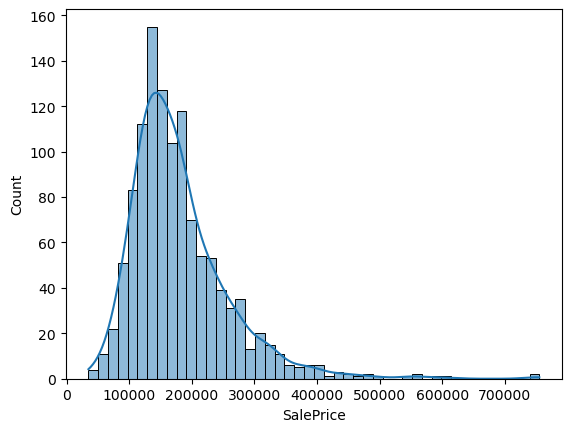

In [63]:
# SalePrice값의 분포 확인
sns.histplot(house['SalePrice'], kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

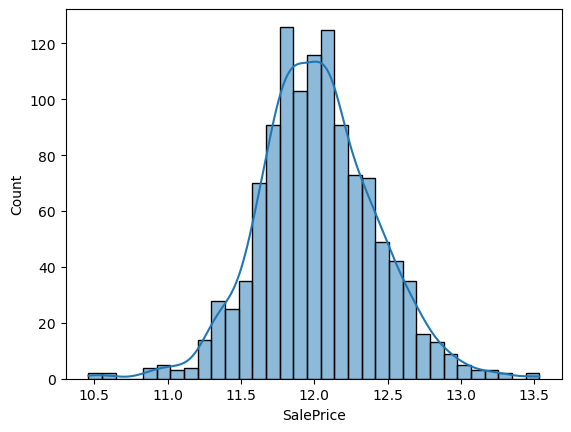

In [64]:
# 분포가 한쪽으로 쏠려 있는 것을 확인할 수 있다
# 로그 함수를 통해 정규분포에 가까운 값으로 변환
log_SalePrice = np.log1p(house['SalePrice'])
sns.histplot(log_SalePrice, kde=True)

* house_df : SalePrice의 값을 log함수로 치환한 df

In [65]:
house_df = house.copy()
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [66]:
# null값을 가지고 있는 컬럼이 굉장히 많다
house_df.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
LotFrontage      218
GarageYrBlt       69
GarageCond        69
GarageType        69
GarageFinish      69
GarageQual        69
BsmtFinType2      24
BsmtExposure      24
BsmtQual          23
BsmtCond          23
BsmtFinType1      23
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [67]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [72]:
# ID는 index 개념의 컬럼이므로 삭제
# PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu는 너무 많은 null값이 있으므로 삭제 필요
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1, inplace=True)

In [73]:
# 컬럼이 74개까지 줄어들었다
house_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,NaN,7390,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,11.813037
1,90,RL,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2009,WD,Alloca,12.095147
2,20,RL,54.0,13811,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,12.078245
3,20,RL,93.0,12030,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2007,New,Partial,12.669810
4,50,RL,60.0,8064,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2000,7,2007,WD,Normal,11.719134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,50,RM,63.0,11426,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,12.206078
1164,20,RL,137.0,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,12.154785
1165,20,RL,NaN,11423,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2000,5,2010,WD,Normal,12.513561
1166,120,RL,62.0,12677,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2008,WD,Normal,12.520887


In [74]:
house_df.isna().sum().sort_values(ascending=False).head(13)

LotFrontage     218
GarageYrBlt      69
GarageCond       69
GarageType       69
GarageFinish     69
GarageQual       69
BsmtFinType2     24
BsmtExposure     24
BsmtQual         23
BsmtFinType1     23
BsmtCond         23
MasVnrArea        8
Electrical        1
dtype: int64

<Axes: ylabel='LotFrontage'>

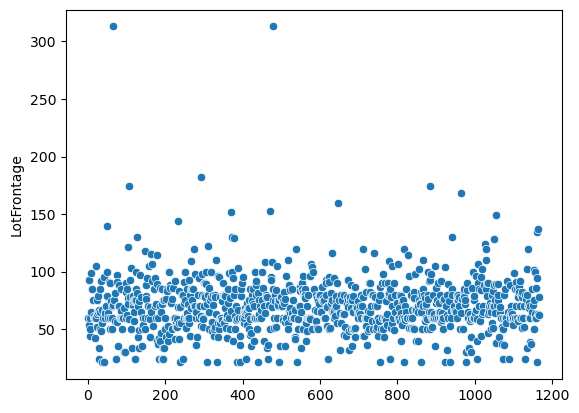

In [75]:
# LotFrontage의 null값이 많은 것이 조금 걸린다
sns.scatterplot(house_df.LotFrontage)

Lot Frontage의 분포를 보니, 꼭대기에 있는 두 개의 데이터를 제외하고는 어느 정도 균형적인 분포를 보이고 있다

NaN값을 평균값으로 대체하고, 이상치로 보이는 두 건을 삭제한다

나머지 수치형 컬럼들의 NaN값도 평균값으로 대체한다.

<Axes: ylabel='LotFrontage'>

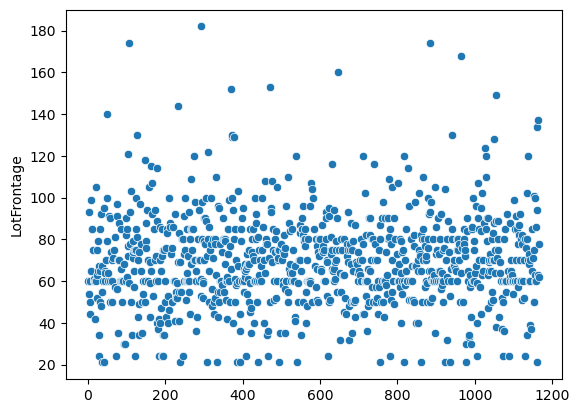

In [76]:
# LotFrontage 이상치 삭제
outlier_index = house_df[house_df['LotFrontage'] > 300].index
house_df.drop(outlier_index, axis=0, inplace=True)

sns.scatterplot(house_df.LotFrontage)

In [77]:
# 수치형 컬럼의 값들에 대해 평균값 대체
# 남은 null값 컬럼은 전부 object형
house_df.fillna(house_df.select_dtypes(include = ['int', 'float']).mean(), inplace=True)
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]

house_df.dtypes[null_column_count.index]

BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

house_df_ohe : one-hot encoding이 적용된 df

In [78]:
# object형 데이터를 위해 one-hot-encoding 적용
house_df_ohe = pd.get_dummies(house_df)

In [79]:
# null값이 존재하는 상태로 one-hot encoding을 실행시 null값은 모든 컬럼 값이 0인 상태로 변환된다
# 따라서 drop_first=True를 적용시킬 수 없다
house_df_ohe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,69.546414,7390,5,7,1955,1955,151.0,902,0,...,False,False,False,True,False,False,False,False,True,False
1,90,60.000000,10800,5,5,1987,1988,0.0,1200,0,...,False,False,False,True,False,False,True,False,False,False
2,20,54.000000,13811,6,6,1987,1987,72.0,980,40,...,False,False,False,True,False,False,False,False,True,False
3,20,93.000000,12030,8,5,2007,2007,254.0,0,0,...,False,True,False,False,False,False,False,False,False,True
4,50,60.000000,8064,5,7,1949,2006,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,50,63.000000,11426,7,5,2003,2003,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
1164,20,137.000000,16492,6,6,1966,2002,0.0,247,713,...,False,False,False,True,False,False,False,False,True,False
1165,20,69.546414,11423,8,5,2001,2002,479.0,1358,0,...,False,False,False,True,False,False,False,False,True,False
1166,120,62.000000,12677,8,5,2003,2004,472.0,1218,0,...,False,False,False,True,False,False,False,False,True,False


In [80]:
# rmse score 확인과 시각화를 편하게 하기 위한 함수 정의
# 큰 오차에 민감하게 반응하는 rmse를 지표로 사
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# 모델이 주어졌을 때, 그 모델의 rmse를 출력하는 함수
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print('로그 변환 RMSE:', np.round(rmse, 3))
    return rmse

# 모델이 여러 개 주어졌을 때, 모델별 rmse를 리턴해주는 함수
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

# 모델이 주어졌을 때, 모델에서 가장 높은 상관관계를 보여주는 값 n개와 낮은 상관관계를 보여주는 값 n개를 리턴하는 함수
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X_features.columns)

    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

# 상관계수를 시각화하여 보여주는 함수
def visualize_coefficient(models):
    fig, axs = plt.subplots(1, 3, figsize=(24, 10))
    fig.tight_layout()

    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])

        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

# 5개의 fold로 교차 검증을 진행한 후, 그 값을 리스트화 하고, 그 평균을 도출하는 함수
def get_avg_rmse_cv(models):

    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring='neg_mean_squared_error', cv=5))

        rmse_avg = np.mean(rmse_list)
        print('\n{} CV RMSE 값 리스트: {}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{} CV 평균 RMSE 값: {}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

# GridSearchCV를 통해 모델을 params별로 학습시키고, 최적의 rmse값을 보여주는 파라미터를 출력하는 함수
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{} 5 CV 시 최적 평균 RMSE 값: {}, 최적 alpha: {}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))

# 예측값을 받아 모델의 rmse를 출력하는 함수
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{} 모델의 RMSE: {}'.format(key, rmse))

In [81]:
# skew 함수는 데이터세트의 왜곡된 정도를 추출하는 함수
# skew를 통해 피처의 왜곡된 정도를 구하고, 왜곡된 정도가 높은 피처의 경우 로그 변환 적용
# 왜곡된 부분을 찾을 때는 house_df를 이용, ohe된 데이터프레임 사용 시 왜곡된 결괏값이 나올 가능성이 높음
from scipy.stats import skew

features_index = house_df.dtypes[house_df.dtypes != 'object'].index
skew_features = house_df[features_index].apply(lambda x: skew(x))

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          22.080120
PoolArea         15.673692
LotArea          11.510394
3SsnPorch        11.030969
LowQualFinSF      9.600368
BsmtFinSF2        4.502846
KitchenAbvGr      4.483926
BsmtHalfBath      4.129593
ScreenPorch       3.972757
EnclosedPorch     3.090527
OpenPorchSF       2.462367
MasVnrArea        2.422021
WoodDeckSF        1.548445
MSSubClass        1.390297
GrLivArea         1.192461
dtype: float64


<Axes: xlabel='MiscVal', ylabel='Count'>

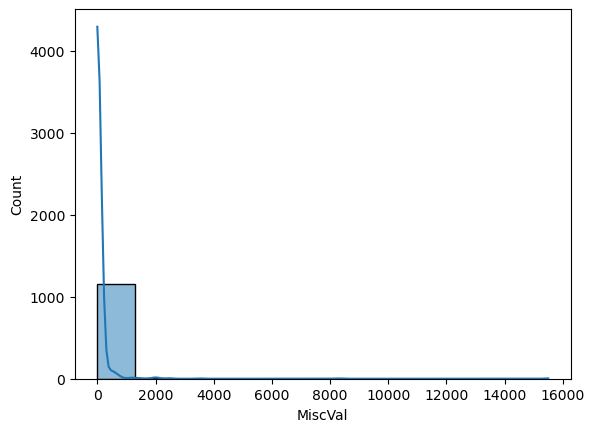

In [82]:
# 왜곡 정도가 가장 높은 컬럼 시각화
sns.histplot(house_df['MiscVal'], kde=True)

<Axes: xlabel='MiscVal', ylabel='Count'>

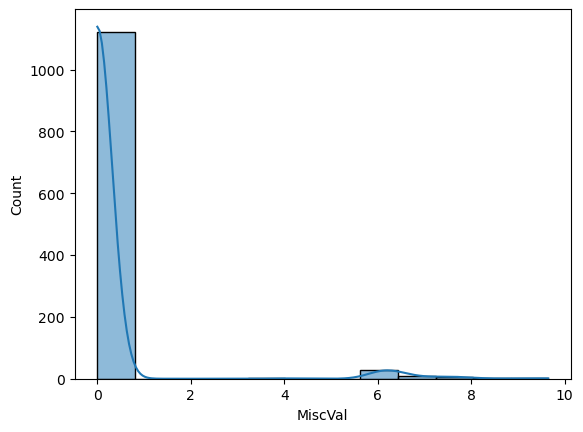

In [83]:
# 로그 변환 적용
# 큰 차이가 없는 듯
sns.histplot(np.log1p(house_df['MiscVal']), kde=True)

<Axes: ylabel='MiscVal'>

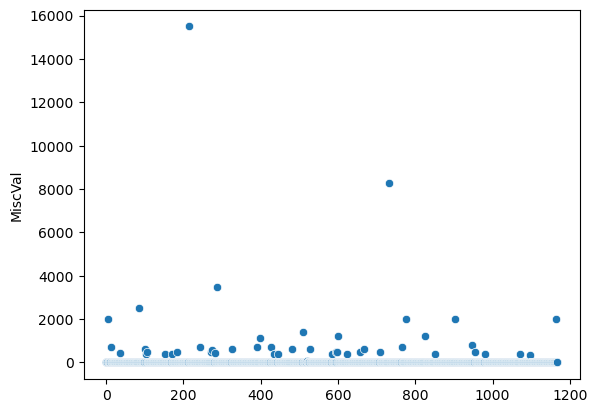

In [84]:
# 산점도로 분포 확인
sns.scatterplot(house_df['MiscVal'])

In [85]:
# 이상치 값 제거
house_df_pp = house_df[house_df['MiscVal'] < 2000]

<Axes: xlabel='MiscVal', ylabel='Count'>

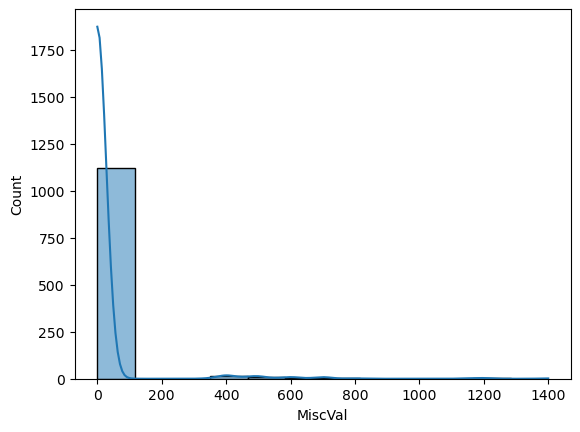

In [86]:
# 제거 후 다시 시각화
sns.histplot(house_df_pp['MiscVal'], kde=True)

<Axes: xlabel='MiscVal', ylabel='Count'>

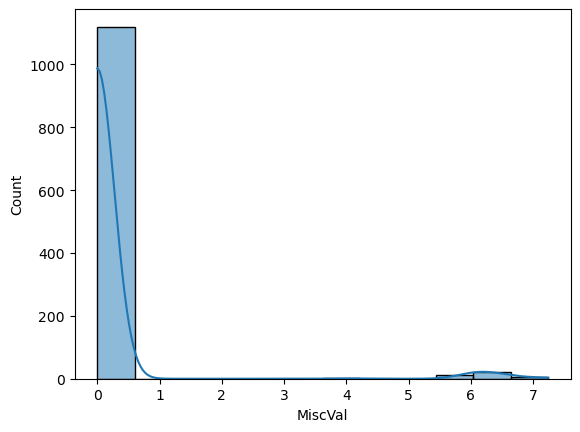

In [87]:
# 결과에 큰 차이가 없음
# 왜곡 정도가 높은 다른 컬럼은 이상치 제거를 진행하지 않고 로그변환 예정
sns.histplot(np.log1p(house_df_pp['MiscVal']), kde=True)

In [88]:
# 1 초과의 높은 왜곡도를 가진 컬럼 로그 변환
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

<Axes: >

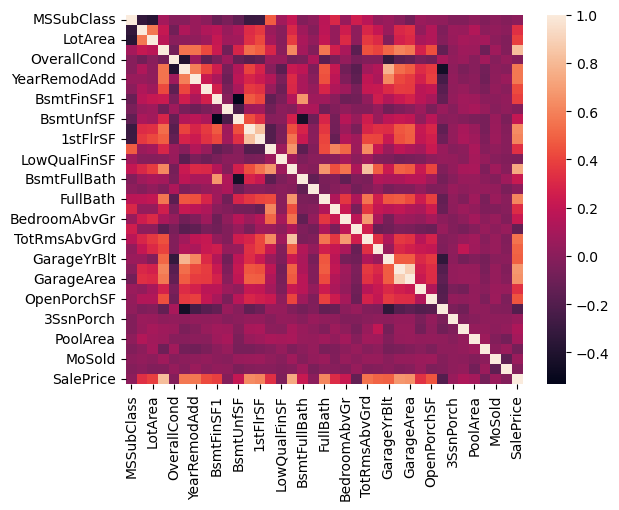

In [91]:
sns.heatmap(house_df.select_dtypes('number').corr())

In [97]:
house_df.select_dtypes('number').corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.322907,-0.367743,0.093380,-0.006227,-0.008285,0.049046,0.006382,-0.114492,-0.056542,...,0.055569,0.036565,0.021923,-0.027196,-0.026880,0.016737,-0.032723,0.007662,-0.019711,0.007882
LotFrontage,-0.322907,1.000000,0.566472,0.213433,-0.083242,0.127789,0.053769,0.136272,0.162447,0.049988,...,0.029738,0.142530,-0.038294,0.057410,0.052290,0.138610,0.011370,0.025904,0.003989,0.335122
LotArea,-0.367743,0.566472,1.000000,0.169647,-0.002640,0.016786,0.024127,0.069307,0.210634,0.073927,...,0.104325,0.140118,-0.017990,0.052885,0.102297,0.080984,0.091365,0.011879,-0.029618,0.385448
OverallQual,0.093380,0.213433,0.169647,1.000000,-0.082423,0.547621,0.545978,0.415523,0.228639,-0.086314,...,0.271667,0.432661,-0.138932,0.017916,0.069138,0.061305,-0.100491,0.074657,-0.026011,0.814735
OverallCond,-0.006227,-0.083242,-0.002640,-0.082423,1.000000,-0.389602,0.077122,-0.156081,-0.049021,0.070583,...,-0.056049,-0.085940,0.103380,0.025612,0.057309,-0.010109,0.082770,-0.014629,0.041867,-0.020016
YearBuilt,-0.008285,0.127789,0.016786,0.547621,-0.389602,1.000000,0.592553,0.413149,0.249395,-0.061090,...,0.313135,0.366246,-0.452772,0.015512,-0.050295,-0.010047,-0.081847,0.012137,-0.011362,0.567304
YearRemodAdd,0.049046,0.053769,0.024127,0.545978,0.077122,0.592553,1.000000,0.221611,0.118181,-0.103278,...,0.269224,0.383812,-0.244625,0.027753,-0.022000,0.002253,-0.091469,0.013579,0.060526,0.564700
MasVnrArea,0.006382,0.136272,0.069307,0.415523,-0.156081,0.413149,0.221611,1.000000,0.261669,-0.047708,...,0.171955,0.201436,-0.175592,0.019901,0.047155,-0.005111,-0.052421,0.034354,-0.001282,0.421481
BsmtFinSF1,-0.114492,0.162447,0.210634,0.228639,-0.049021,0.249395,0.118181,0.261669,1.000000,-0.003252,...,0.169406,0.107553,-0.140852,0.031823,0.080556,0.070465,0.003039,0.002100,0.026587,0.385922
BsmtFinSF2,-0.056542,0.049988,0.073927,-0.086314,0.070583,-0.061090,-0.103278,-0.047708,-0.003252,1.000000,...,0.064078,-0.049574,0.054139,-0.012169,0.076016,0.102768,0.047092,-0.009229,0.023422,-0.020438


In [100]:
corr_matrix = house_df.select_dtypes('number').corr()
high_corr = corr_matrix.where((corr_matrix >= 0.7) & (corr_matrix != 1))
low_corr = corr_matrix.where(corr_matrix <=-0.7)

# 상관관계가 0.5 이상인 컬럼의 조합 추출
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']

low_corr_pairs = low_corr.stack().reset_index()
low_corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']

low_corr_pairs
# 결과 출력
print('high_corr_pairs')
print(high_corr_pairs)
print('low_corr_pairs')
print(low_corr_pairs)

high_corr_pairs
        Column 1      Column 2  Correlation
0    OverallQual     SalePrice     0.814735
1      YearBuilt   GarageYrBlt     0.780909
2    TotalBsmtSF      1stFlrSF     0.829120
3       1stFlrSF   TotalBsmtSF     0.829120
4      GrLivArea  TotRmsAbvGrd     0.829823
5      GrLivArea     SalePrice     0.741664
6   TotRmsAbvGrd     GrLivArea     0.829823
7    GarageYrBlt     YearBuilt     0.780909
8     GarageCars    GarageArea     0.888638
9     GarageArea    GarageCars     0.888638
10     SalePrice   OverallQual     0.814735
11     SalePrice     GrLivArea     0.741664
low_corr_pairs
Empty DataFrame
Columns: [Column 1, Column 2, Correlation]
Index: []


* 상관관계 분석시 SalePrice와 높은 상관관계를 보이는 컬럼은 OverallQual, GrLivArea가 있다.

* 높은 음의 상관관계를 보이는 값은 없다.

In [89]:
# one-hot encoding 적용
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# Modeling

### Linear Regression
### Ridge
### Lasso

In [28]:
# 선형 회귀, Ridge, Lasso model, 최적화 값 찾기
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha' : [0.0003,0.0004, 0.0005, 0.0006, 0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1258, 최적 alpha: {'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1247, 최적 alpha: {'alpha': 0.0006}


로그 변환 RMSE: 0.125
로그 변환 RMSE: 0.12
로그 변환 RMSE: 0.112


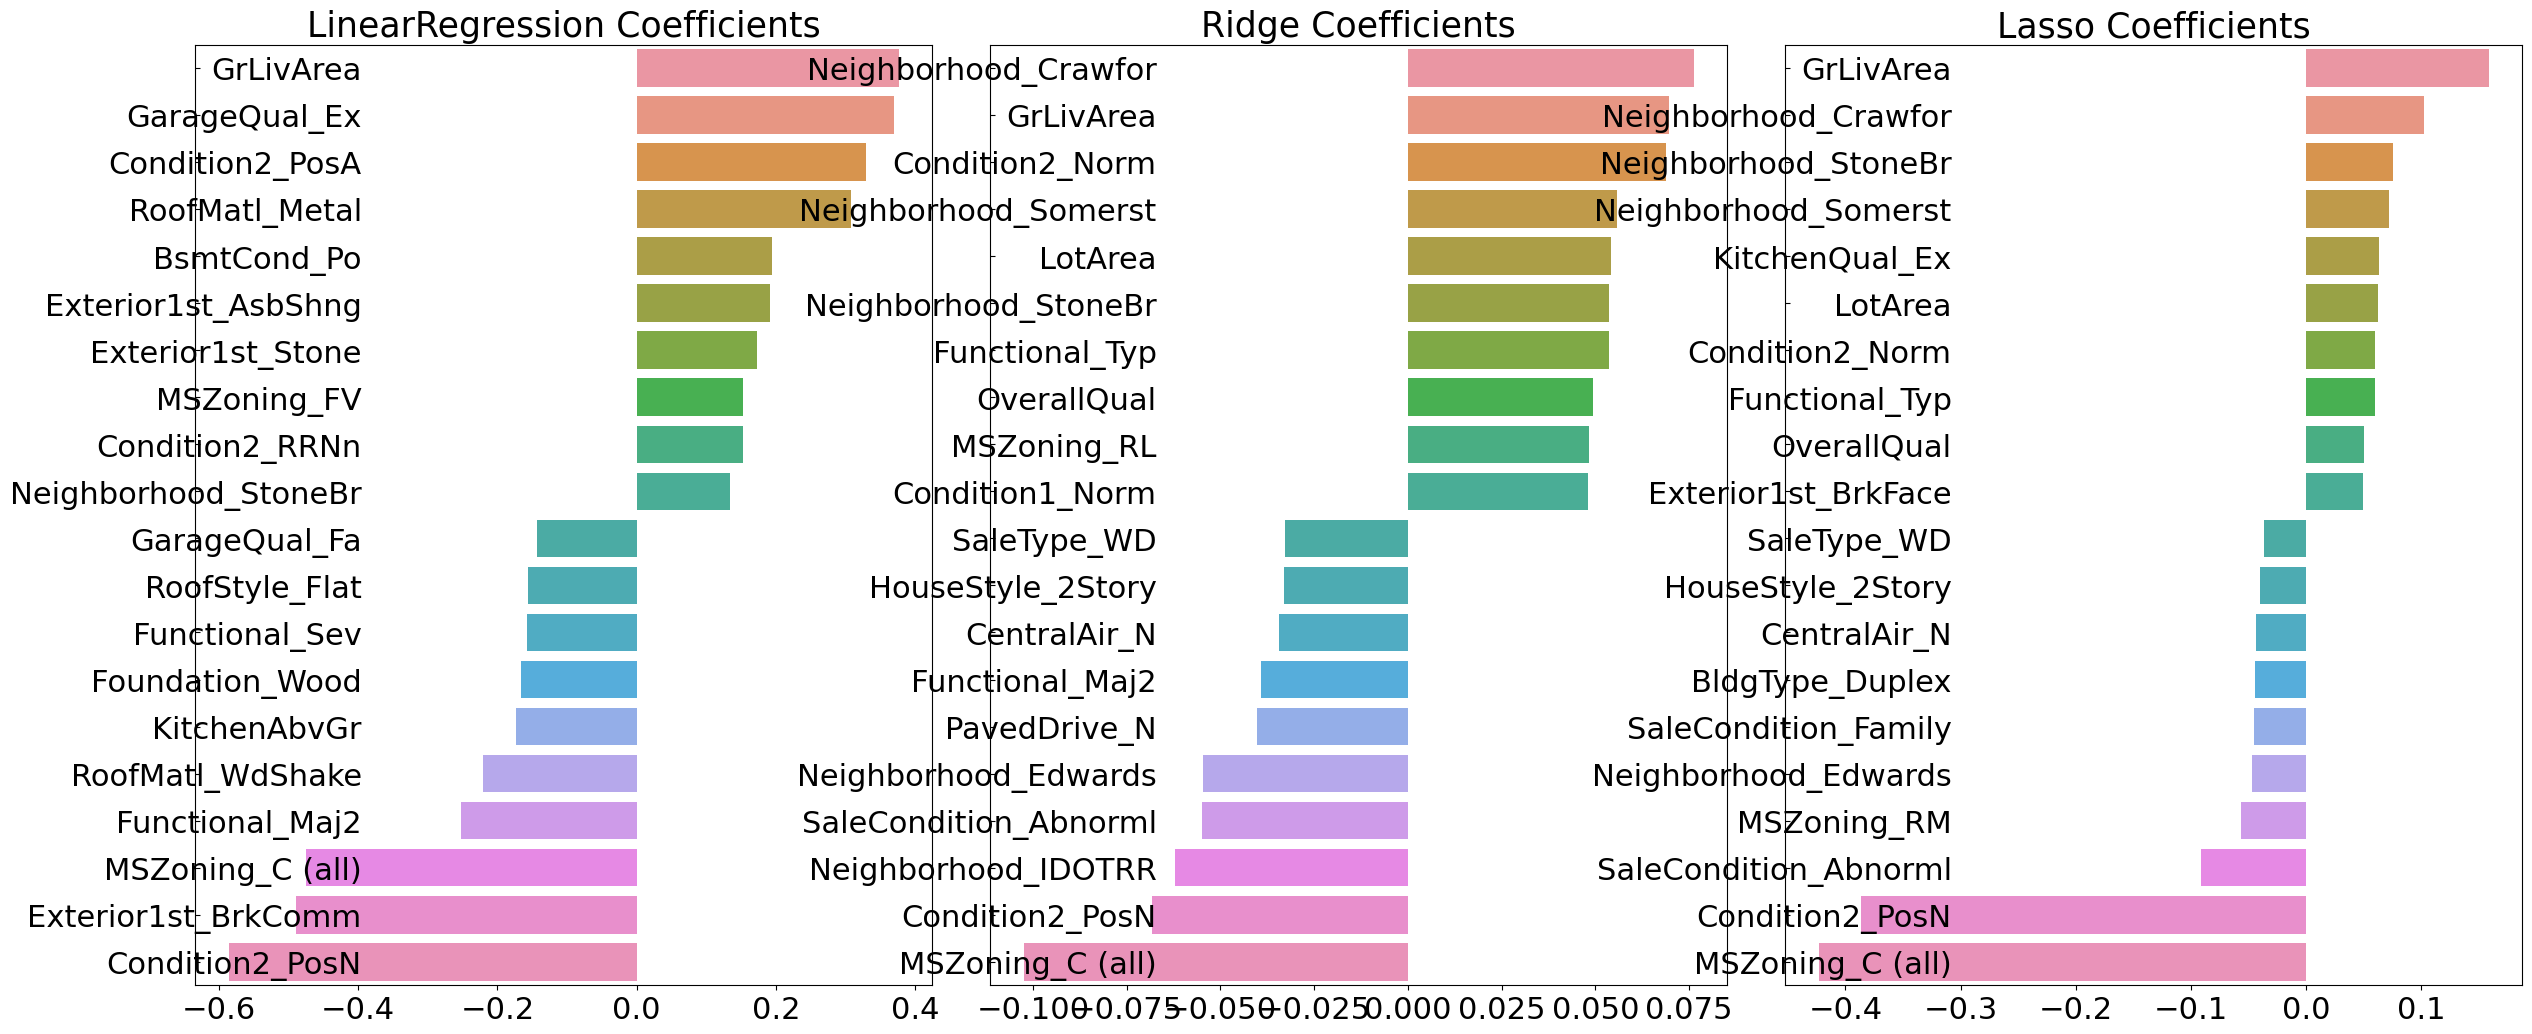

In [33]:
# 최적화 값으로 학습
# Lasso가 가장 좋은 성능을 보여줌
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=15)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.0006)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 상관 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

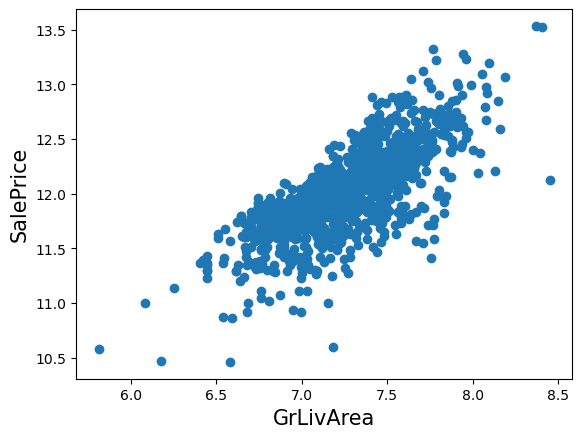

In [34]:
# LinearRegression에서 가장 높은 상관계수를 보여주는 GrLivArea 시각화
# 정상적인 분포를 보여줌
plt.scatter(x = house_df_ohe['GrLivArea'], y = house_df_ohe['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

### XGBoost
### LightGBM

In [36]:
# XGBoost 최적 파라미터 찾기
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000, 1100, 1200, 1300]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1314, 최적 alpha: {'n_estimators': 1000}


In [37]:
# LightGBM 최적 파라미터 찾기
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000, 1100, 1200, 1300]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, verbose=-1)
print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1263, 최적 alpha: {'n_estimators': 1000}


In [38]:
# 최적 파라미터로 학습 진행
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.4, learning_rate=0.05, n_estimators=1000,
              num_leaves=4, reg_lambda=10, subsample=0.6, verbose=-1)

In [39]:
# rmse값 계산
get_rmses([xgb_reg, lgbm_reg])

로그 변환 RMSE: 0.119
로그 변환 RMSE: 0.122


[0.11870011566810008, 0.12192300627129757]

In [40]:
# ridge와 lasso를 4:6 비율로 혼합하여 예측
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred, 'Ridge': ridge_pred, 'Lasso': lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.11437895033499244
Ridge 모델의 RMSE: 0.12075774217638059
Lasso 모델의 RMSE: 0.11204548153407451


In [41]:
# xgboost, lightgbm을 5:5 비율로 혼합하여 예측
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg =LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred, 'xgb': xgb_pred, 'lgbm': lgbm_pred}
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.11550300218357615
xgb 모델의 RMSE: 0.11870011566810008
lgbm 모델의 RMSE: 0.12192300627129757


In [42]:
# stacking 방식 사용
# ridge, lasso, lightgbm, xgboost를 사용하여 스태킹 방식으로 예측

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# n_fold만큼 데이터셋을 나눈 후 모델을 학습시키고, 결괏값을 리턴
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False)
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        test_pred[:, folder_counter] = model.predict(X_test_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)

    return train_fold_pred, test_pred_mean

In [43]:
# 네 개 모델로 스태킹 진행
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

In [44]:
# 스태킹 모델을 학습시키고 RMSE값 확인
# 스태킹 모델은 Lasso 방식
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

meta_model_lasso = Lasso(alpha=0.0005)

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.11459032226799293


In [45]:
# 최종 모델에 Ridge 적용
# 결괏값 개선
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

meta_model_ridge = Ridge(alpha=8)

meta_model_ridge.fit(Stack_final_X_train, y_train)
final = meta_model_ridge.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.11223913059917563


In [46]:
# XGB, LGBM, LR은 전부 Ridge보다 좋은 성능을 보여주지는 못함
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

meta_model_xgb = XGBRegressor(alpha=8)

meta_model_xgb.fit(Stack_final_X_train, y_train)
final = meta_model_xgb.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.13412101201136545


In [47]:
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

meta_model_lgbm = LGBMRegressor(alpha=8)

meta_model_lgbm.fit(Stack_final_X_train, y_train)
final = meta_model_lgbm.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.1278450202649054


In [48]:
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

meta_model_lgbm = LinearRegression()

meta_model_lgbm.fit(Stack_final_X_train, y_train)
final = meta_model_lgbm.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.11453149115867252


# Submission

In [49]:
# 테스트 데이터를 학습 데이터와 같은 형식으로 정제
test = pd.read_csv('aiffel_house_test.csv')

def preprocessing(df):
    df_copy = df.copy()
    df_copy.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1, inplace=True)
    df_copy[skew_features_top.index] = np.log1p(df_copy[skew_features_top.index])
    df_copy = pd.get_dummies(df_copy)
    df_copy.fillna(df_copy.select_dtypes(include = ['int', 'float']).mean(), inplace=True)

    return df_copy

test = preprocessing(test)

# 테스트 데이터를 one-hot encoding할 경우, train 데이터보다 컬럼 수가 적게 되므로, 컬럼 수를 맞춰주는 프로세스가 필요함
cols = []
for col in house_df_ohe.columns:
   if col not in test.columns:
       cols.append(col)

for i in cols:
    test[i] = 0

test = test[[i for i in house_df_ohe.columns]]

test.drop('SalePrice', axis=1, inplace=True)

In [50]:
house_df_ohe

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.044522,69.546414,8.908018,5,7,1955,1955,5.023881,902,0.000000,...,False,False,False,True,False,False,False,False,True,False
1,4.510860,60.000000,9.287394,5,5,1987,1988,0.000000,1200,0.000000,...,False,False,False,True,False,False,True,False,False,False
2,3.044522,54.000000,9.533293,6,6,1987,1987,4.290459,980,3.713572,...,False,False,False,True,False,False,False,False,True,False
3,3.044522,93.000000,9.395242,8,5,2007,2007,5.541264,0,0.000000,...,False,True,False,False,False,False,False,False,False,True
4,3.931826,60.000000,8.995289,5,7,1949,2006,0.000000,0,0.000000,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3.931826,63.000000,9.343734,7,5,2003,2003,0.000000,0,0.000000,...,False,False,False,True,False,False,False,False,True,False
1164,3.044522,137.000000,9.710691,6,6,1966,2002,0.000000,247,6.570883,...,False,False,False,True,False,False,False,False,True,False
1165,3.044522,69.546414,9.343472,8,5,2001,2002,6.173786,1358,0.000000,...,False,False,False,True,False,False,False,False,True,False
1166,4.795791,62.000000,9.447623,8,5,2003,2004,6.159095,1218,0.000000,...,False,False,False,True,False,False,False,False,True,False


In [51]:
test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,121.000000,9.684087,8,5,1991,1992,5.652489,0,0.000000,...,False,False,False,True,False,0,False,False,True,False
1,4.110874,82.000000,9.205428,7,5,1995,1995,5.673323,565,0.000000,...,False,False,False,True,True,0,False,False,False,False
2,3.931826,79.000000,9.158099,6,7,1941,1950,0.000000,403,5.111988,...,False,False,False,True,False,0,False,False,True,False
3,4.262680,50.000000,9.239996,7,6,1921,1950,0.000000,0,0.000000,...,False,False,False,True,False,0,False,False,True,False
4,3.931826,80.000000,9.045584,5,5,1947,1950,0.000000,442,0.000000,...,False,False,False,False,True,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3.713572,70.015936,10.068832,7,6,1979,1979,0.000000,1258,0.000000,...,False,False,False,True,False,0,False,False,True,False
288,4.110874,63.000000,8.971575,7,5,2003,2003,0.000000,0,0.000000,...,False,False,False,True,False,0,False,False,True,False
289,4.394449,70.015936,9.285912,7,5,1991,1992,4.343805,0,0.000000,...,False,False,False,True,False,0,False,False,True,False
290,3.044522,50.000000,8.987322,6,6,1948,2002,0.000000,680,0.000000,...,False,False,False,True,False,0,False,False,True,False


In [54]:
# X_features 값을 스태킹 모델에 학습
X_train_n = X_features.values
X_test_n = test.values
y_train_n = y_target.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

In [56]:
# Ridge를 적용한 스태킹 모델에 test데이터 predict
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

meta_model = Ridge(alpha=5)

meta_model.fit(Stack_final_X_train, y_target)
final = meta_model.predict(Stack_final_X_test)

In [57]:
# submission 파일 읽어오기
submission = pd.read_csv('aiffel_house_sample_submission.csv')

In [58]:
# submission.csv 제출
a=ridge_reg.predict(test).reshape(-1, 1)
b=lasso_reg.predict(test).reshape(-1, 1)
c=xgb_reg.predict(test).reshape(-1, 1)
d=lgbm_reg.predict(test).reshape(-1, 1)

Stack_final_X_test = np.concatenate((a, b, c, d), axis=1)
final = meta_model.predict(Stack_final_X_test)

submission = pd.DataFrame({'id': submission['Id'], 'SalePrice': np.expm1(final)})
submission.to_csv('submission.csv', index=False)